In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

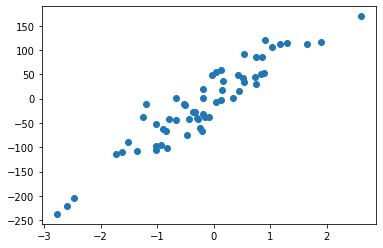

In [3]:
x, y = make_regression(n_samples=200, n_features=1, noise = 30)
x_treino, x_teste, y_treino, y_teste =train_test_split(x, y, test_size= 0.3)

plt.scatter(x_teste,y_teste)
plt.show()

In [4]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)
resultado = modelo.score(x_teste, y_teste) # Coeficiente de determinação R quadrado da predição, quanto mais próximo de 1 melhor

print(resultado)

0.876449474046071


In [5]:
modelo.intercept_

3.9810433702177033

In [6]:
modelo.coef_

array([79.44743661])

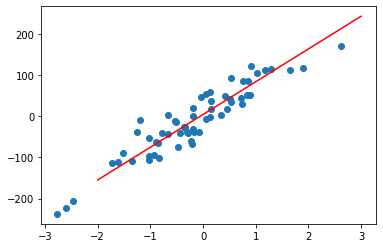

In [7]:
plt.scatter(x_teste,y_teste)
xreg = range(-2,4, 1)

plt.plot(xreg, modelo.intercept_ + xreg*modelo.coef_, color = 'red')
plt.show()

<h1>Regressão Linear para Dados Imobiliários<h1>

Foram coletados dados imobiliários que contém dados de casas vendidas da região de King County (USA) com o intuito de realizar uma regressão linear pra rever preços de casas.<br>
O modelo será treinado em 70% dos dados e para medir a performance será usado o Coeficiente de determinação $R^2$ da predição, quanto mais próximo de 1 seu valor, melhor o modelo terá de performance.

Link dos dados:  https://www.kaggle.com/harlfoxem/housesalesprediction

In [8]:
# Dados Imobiliarios dos EUA

df = pd.read_csv('kc_house_data.csv')

In [9]:
# Limpeza dos dados

df_house = (df.drop(['id', 'date', 'long', 'lat', 'zipcode'], axis='columns')).copy()

x = df_house.loc[:, df_house.columns != 'price']
y = df_house.loc[:, df_house.columns == 'price']

#y = df_house['price']
#x = df_house.drop(['price'], axis='columns')

# Separando dados em teste e treino
x_treino, x_teste, y_treino, y_teste =train_test_split(df_house.loc[:, df_house.columns != 'price'], df_house.loc[:, df_house.columns == 'price'], 
                                                       test_size= 0.3, random_state= 10)

Desconsideramos a variáveis <b>id</b>, <b>date</b>, <b>long</b>, <b>lat</b> e <b>zipcode</b> pois não são relevantes para explicar o modelo.

<ul>
<li>Id: Número Único de cada casa</li>
<li>Date: Data de Venda</li>
<li>Long: Longitude</li>
<li>Lat:Latitude</li>
<li>Zipcode: Código Zip (CEP)</li>
</ul>

In [10]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino) # Treinando modelo
resultado = modelo.score(x_teste, y_teste) # Coeficiente de determinação R quadrado da predição, quanto mais próximo de 1 melhor, realizando nos dados de teste

print(resultado)

0.6608668622831368


In [11]:
modelo.intercept_

array([5962933.36298389])

In [12]:
modelo.coef_

array([[-3.74904870e+04,  4.26245474e+04,  1.01816470e+02,
        -8.36903887e-02,  2.28754596e+04,  5.55262013e+05,
         4.27078718e+04,  2.00183311e+04,  1.24843127e+05,
         4.93868179e+01,  5.24296523e+01, -3.46486295e+03,
         6.12640926e+00,  3.00673514e+01, -4.35823714e-01]])

O $R^2$ do modelo foi 0,66.